# Data preparation

#### Made by:
* Teresa Marcelino (teresamarcelino98@gmail.com)



----

* [Load Libraries](#)


* [Pre-processing](#)

    
* [1. Split Data to general case](#1)


* [2. Split Data to speciality case](#2)


* [3. Split Data to surgeon case](#3)


-----

### Load Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import shap
import matplotlib.pyplot as plt
#from rulefit import RuleFit

import sklearn

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
#Encoder
from category_encoders import TargetEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import *
import matplotlib
import copy
from datetime import datetime

from sklearn.linear_model import LassoCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score

from tabulate import tabulate
import pickle

### Pre-processing

In [18]:
%store -r data_ml #load dataset generated in other Exploration notebook
data_ml.head()

no stored variable or alias #load
no stored variable or alias dataset
no stored variable or alias generated
no stored variable or alias in
no stored variable or alias other
no stored variable or alias Exploration
no stored variable or alias notebook


,Speciality,Daily Surgery Number_perDoctor,Surgery Number Performed_perDoctor,Part of the day,CUF_Unit,FLG_AMB_INT,Anesthesia,FLG_PROG_URG,I1,Procedures_I,Doctor,Gender,Real Room Duration,Age,CUF Planned Duration,Month,Weekday
0,CIRURGIA GERAL,4,78,Noon(13-16),11,I,RAQ,P,39150013,1,132273102,M,41,65.0,60,April,Tuesday
1,OFTALMOLOGIA,2,51,Morning(9-12),11,A,SED,P,46050006,1,093935231,M,32,71.0,60,July,Wednesday
2,UROLOGIA,1,51,Noon(13-16),11,I,RAQ,P,40010045,1,775653212,M,27,71.0,60,April,Thursday
3,UROLOGIA,1,28,Eve(17-20),11,I,AG,P,40010038,3,462002202,M,55,71.0,60,May,Monday
4,UROLOGIA,1,34,Eve(17-20),11,A,AG,P,40010038,1,462002202,M,12,71.0,60,June,Monday


In [19]:
data_ml.rename(columns = {'RealRoomDuration':'Real Room Duration','SurgeryNumber':'Daily Surgery Number_perDoctor','SurgeryPerformed_perDoctor':'Surgery Number Performed_perDoctor','part_of_day':'Part of the day','CUFPlannedDuration':'CUF Planned Duration'}, inplace = True)

In [20]:
dataset_cuf = data_ml.copy()
dataset_cuf.tail()

,Speciality,Daily Surgery Number_perDoctor,Surgery Number Performed_perDoctor,Part of the day,CUF_Unit,FLG_AMB_INT,Anesthesia,FLG_PROG_URG,I1,Procedures_I,Doctor,Gender,Real Room Duration,Age,CUF Planned Duration,Month,Weekday
169767,OTORRINOLARINGOLOGIA,2,1125,Morning(9-12),14,I,AG,P,47000017,1,57140008,F,83,42.0,90,October,Monday
169768,CIRURGIA GERAL,1,132,Late Night(1-4),14,I,AG,U,39090004,1,39740008,F,112,76.0,1425,December,Wednesday
169769,CIRURGIA VASCULAR,3,398,Eve(17-20),14,I,AG,P,35030306,1,3301005,F,62,39.0,90,February,Tuesday
169770,NEURO-CIRURGIA,1,210,Morning(9-12),14,I,AG,P,45040012,1,086129802,F,390,71.0,240,August,Monday
169771,DERMATOLOGIA,3,119,Noon(13-16),14,A,ALOC,P,300000082,1,445920981,M,15,84.0,15,December,Wednesday


In [21]:
dataset_cuf = dataset_cuf[dataset_cuf.Speciality != 'ADMINISTRAÇÃO REQUISIÇÕES']

In [31]:
dataset_cuf['Doctor'].value_counts().head(10)

6030005      1968
1800005      1718
96440008     1581
5050005      1542
9240005      1510
996354981    1272
1210005      1266
1900005      1211
0040005      1190
2900005      1152
Name: Doctor, dtype: int64

In [6]:
dataset_cuf=dataset_cuf.replace(to_replace ="PNEUMOLOGIA", value ="Pulmonology")
dataset_cuf=dataset_cuf.replace(to_replace ="CIRURGIA CARDÍACA", value ="Cardiac surgery")
dataset_cuf=dataset_cuf.replace(to_replace ="DERMATOLOGIA", value ="Dermatology")
dataset_cuf=dataset_cuf.replace(to_replace ="CIRURGIA PEDIÁTRICA", value ="Pediatric Surgery")
dataset_cuf=dataset_cuf.replace(to_replace ="MEDICINA INTERNA", value ="Internal Medicine")
dataset_cuf=dataset_cuf.replace(to_replace ="CARDIOLOGIA", value ="Cardiology")
dataset_cuf=dataset_cuf.replace(to_replace ="GINECOLOGIA OBSTETRÍCIA", value ="Obstetrics and Gynecology")
dataset_cuf=dataset_cuf.replace(to_replace ="OTORRINOLARINGOLOGIA", value ="Otorhinolaryngology")
dataset_cuf=dataset_cuf.replace(to_replace ="CIRURGIA GERAL", value ="General surgery")
dataset_cuf=dataset_cuf.replace(to_replace ="OFTALMOLOGIA", value ="Ophthalmology")
dataset_cuf=dataset_cuf.replace(to_replace ="ORTOPEDIA", value ="Orthopedics")
dataset_cuf=dataset_cuf.replace(to_replace ="CIRURGIA VASCULAR", value ="Vascular Surgery")
dataset_cuf=dataset_cuf.replace(to_replace ="UROLOGIA", value ="Urology")
dataset_cuf=dataset_cuf.replace(to_replace ="NEURO-CIRURGIA", value ="Neurosurgery")
dataset_cuf=dataset_cuf.replace(to_replace ="MEDICINA DENTÁRIA", value ="Dental Medicine")
dataset_cuf=dataset_cuf.replace(to_replace ="CIR. PLÁSTICA E RECONSTRUTIVA E ESTÉTICA", value ="Plastic, Reconstructive and Aesthetic Surgery")
dataset_cuf=dataset_cuf.replace(to_replace ="CIRURGIA MAXILO-FACIAL", value ="Maxillofacial Surgery")
dataset_cuf=dataset_cuf.replace(to_replace ="ANESTESIOLOGIA", value ="Anesthesiology")
dataset_cuf=dataset_cuf.replace(to_replace ="ANGIOGRAFIA", value ="Angiography")
dataset_cuf=dataset_cuf.replace(to_replace ="CIRURGIA TORÁCICA", value ="Thoracic Surgery")
dataset_cuf=dataset_cuf.replace(to_replace ="GASTROENTEROLOGIA", value ="Gastroenterology")
dataset_cuf=dataset_cuf.replace(to_replace ="IMAGIOLOGIA", value ="Imagiology")
dataset_cuf=dataset_cuf.replace(to_replace ="RADIOTERAPIA", value ="Radiotherapy")
dataset_cuf=dataset_cuf.replace(to_replace ="HEMATO/ONCOLOGIA", value ="Hemato/Oncology")
dataset_cuf=dataset_cuf.replace(to_replace ="NEUROLOGIA", value ="Neurology")

In [7]:
# converting Gender to binary data
# female is 1, male is 0
df_one_gender = pd.get_dummies(dataset_cuf["Gender"])
dataset_cuf = pd.concat((df_one_gender, dataset_cuf), axis=1)
dataset_cuf = dataset_cuf.drop(["Gender"], axis=1)
dataset_cuf = dataset_cuf.drop(["M"], axis=1)
dataset_cuf = dataset_cuf.rename(columns={"F": "Gender"})

In [8]:
# converting Hospitalization to binary data
# Outpatient is 1, Inpatient is 0
df_one_amb = pd.get_dummies(dataset_cuf["FLG_AMB_INT"])
dataset_cuf = pd.concat((df_one_amb, dataset_cuf), axis=1)
dataset_cuf = dataset_cuf.drop(["FLG_AMB_INT"], axis=1)
dataset_cuf = dataset_cuf.drop(["I"], axis=1)
dataset_cuf = dataset_cuf.rename(columns={"A": "Hospitalization"})


In [9]:
# converting Urgency to binary data
df_one_flag_U_P = pd.get_dummies(dataset_cuf["FLG_PROG_URG"])
# Urgency is 1, Progammed is 0
dataset_cuf = pd.concat((df_one_flag_U_P, dataset_cuf), axis=1)
dataset_cuf = dataset_cuf.drop(["FLG_PROG_URG"], axis=1)
dataset_cuf = dataset_cuf.drop(["P"], axis=1)
dataset_cuf = dataset_cuf.rename(columns={"U": "Urgency"})

-----

### 1. Split Data to general case  <a class="anchor" id="1"></a>

In [39]:
train_dataset = dataset_cuf.sample(frac=0.8, random_state=123)
test_dataset = dataset_cuf.drop(train_dataset.index)

In [40]:
generalization_dataset = test_dataset.sample(frac=0.5, random_state=123)
test_dataset = test_dataset.drop(generalization_dataset.index)

In [41]:
Genenal_Dataset={}
Genenal_Dataset.update({"GeneralizationSet_Before_Encoding": generalization_dataset})

In [43]:
encoder = TargetEncoder()
train_dataset['DESCR_SERVICO_new'] = encoder.fit_transform(train_dataset['Speciality'],train_dataset['Real Room Duration'])
test_dataset['DESCR_SERVICO_new'] = encoder.transform(test_dataset['Speciality'],test_dataset['Real Room Duration'])
generalization_dataset['DESCR_SERVICO_new'] = encoder.transform(generalization_dataset['Speciality'],generalization_dataset['Real Room Duration'])


encoder = TargetEncoder()
train_dataset['Part of the day_new'] = encoder.fit_transform(train_dataset['Part of the day'],train_dataset['Real Room Duration'])
test_dataset['Part of the day_new'] = encoder.transform(test_dataset['Part of the day'],test_dataset['Real Room Duration'])
generalization_dataset['Part of the day_new'] = encoder.transform(generalization_dataset['Part of the day'],generalization_dataset['Real Room Duration'])


encoder = TargetEncoder()
train_dataset['COD_UNIDADE_new'] = encoder.fit_transform(train_dataset['CUF_Unit'],train_dataset['Real Room Duration'])
test_dataset['COD_UNIDADE_new'] = encoder.transform(test_dataset['CUF_Unit'],test_dataset['Real Room Duration'])
generalization_dataset['COD_UNIDADE_new'] = encoder.transform(generalization_dataset['CUF_Unit'],generalization_dataset['Real Room Duration'])

encoder = TargetEncoder()
train_dataset['I1_new'] = encoder.fit_transform(train_dataset['I1'],train_dataset['Real Room Duration'])
test_dataset['I1_new'] = encoder.transform(test_dataset['I1'],test_dataset['Real Room Duration'])
generalization_dataset['I1_new'] = encoder.transform(generalization_dataset['I1'],generalization_dataset['Real Room Duration'])

encoder = TargetEncoder()
train_dataset['MEDICO_new'] = encoder.fit_transform(train_dataset['Doctor'],train_dataset['Real Room Duration'])
test_dataset['MEDICO_new'] = encoder.transform(test_dataset['Doctor'],test_dataset['Real Room Duration'])
generalization_dataset['MEDICO_new'] = encoder.transform(generalization_dataset['Doctor'],generalization_dataset['Real Room Duration'])

encoder = TargetEncoder()
train_dataset['Month_new'] = encoder.fit_transform(train_dataset['Month'],train_dataset['Real Room Duration'])
test_dataset['Month_new'] = encoder.transform(test_dataset['Month'],test_dataset['Real Room Duration'])
generalization_dataset['Month_new'] = encoder.transform(generalization_dataset['Month'],generalization_dataset['Real Room Duration'])

encoder = TargetEncoder()
train_dataset['Weekday_new'] = encoder.fit_transform(train_dataset['Weekday'],train_dataset['Real Room Duration'])
test_dataset['Weekday_new'] = encoder.transform(test_dataset['Weekday'],test_dataset['Real Room Duration'])
generalization_dataset['Weekday_new'] = encoder.transform(generalization_dataset['Weekday'],generalization_dataset['Real Room Duration'])

encoder = TargetEncoder()
train_dataset['ANESTESIA_new'] = encoder.fit_transform(train_dataset['Anesthesia'],train_dataset['Real Room Duration'])
test_dataset['ANESTESIA_new'] = encoder.transform(test_dataset['Anesthesia'],test_dataset['Real Room Duration'])
generalization_dataset['ANESTESIA_new'] = encoder.transform(generalization_dataset['Anesthesia'],generalization_dataset['Real Room Duration'])

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


In [44]:
train_dataset=train_dataset.drop(columns=['Speciality','Part of the day','CUF_Unit','I1','Doctor','Month','Weekday','Anesthesia'])
test_dataset=test_dataset.drop(columns=['Speciality','Part of the day','CUF_Unit','I1','Doctor','Month','Weekday','Anesthesia'])
generalization_dataset=generalization_dataset.drop(columns=['Speciality','Part of the day','CUF_Unit','I1','Doctor','Month','Weekday','Anesthesia'])


train_dataset.rename(columns = {'DESCR_SERVICO_new':'Speciality','Part of the day_new':'Part of the day','COD_UNIDADE_new':'CUF_Unit','I1_new':'I1','MEDICO_new':'Doctor','Month_new':'Month','Weekday_new':'Weekday','ANESTESIA_new':'Anesthesia'}, inplace = True)
test_dataset.rename(columns = {'DESCR_SERVICO_new':'Speciality','Part of the day_new':'Part of the day','COD_UNIDADE_new':'CUF_Unit','I1_new':'I1','MEDICO_new':'Doctor','Month_new':'Month','Weekday_new':'Weekday','ANESTESIA_new':'Anesthesia'}, inplace = True)
generalization_dataset.rename(columns = {'DESCR_SERVICO_new':'Speciality','Part of the day_new':'Part of the day','COD_UNIDADE_new':'CUF_Unit','I1_new':'I1','MEDICO_new':'Doctor','Month_new':'Month','Weekday_new':'Weekday','ANESTESIA_new':'Anesthesia'}, inplace = True)

In [49]:

Genenal_Dataset.update({"TrainSet": train_dataset})
Genenal_Dataset.update({"TestSet": test_dataset})
Genenal_Dataset.update({"GeneralizationSet_After_Encoding": generalization_dataset})

In [7]:
%store -r Genenal_Dataset

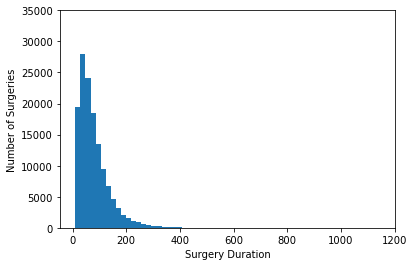

In [12]:
x = Genenal_Dataset['TrainSet']['Real Room Duration']
plt.hist(x, bins = 60)
plt.ylim(0,35000)
plt.xlabel('Surgery Duration')
plt.ylabel('Number of Surgeries')
plt.show()

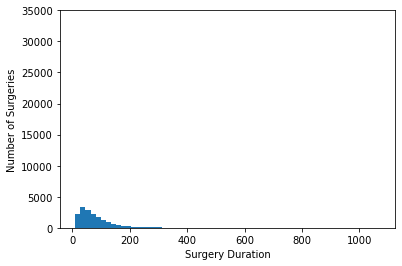

In [13]:
x = Genenal_Dataset['TestSet']['Real Room Duration']
plt.hist(x, bins = 60)
plt.ylim(0,35000)
plt.xlabel('Surgery Duration')
plt.ylabel('Number of Surgeries')
plt.show()

### 2. Split Data to speciality case  <a class="anchor" id="2"></a>

In [51]:
speciality_model=dataset_cuf.copy()


In [52]:
speciality_model=speciality_model.replace(to_replace ="PNEUMOLOGIA", value ="Pulmonology")
speciality_model=speciality_model.replace(to_replace ="CIRURGIA CARDÍACA", value ="Cardiac surgery")
speciality_model=speciality_model.replace(to_replace ="DERMATOLOGIA", value ="Dermatology")
speciality_model=speciality_model.replace(to_replace ="CIRURGIA PEDIÁTRICA", value ="Pediatric Surgery")
speciality_model=speciality_model.replace(to_replace ="MEDICINA INTERNA", value ="Internal Medicine")
speciality_model=speciality_model.replace(to_replace ="CARDIOLOGIA", value ="Cardiology")
speciality_model=speciality_model.replace(to_replace ="GINECOLOGIA OBSTETRÍCIA", value ="Obstetrics and Gynecology")
speciality_model=speciality_model.replace(to_replace ="OTORRINOLARINGOLOGIA", value ="Otorhinolaryngology")
speciality_model=speciality_model.replace(to_replace ="CIRURGIA GERAL", value ="General surgery")
speciality_model=speciality_model.replace(to_replace ="OFTALMOLOGIA", value ="Ophthalmology")
speciality_model=speciality_model.replace(to_replace ="ORTOPEDIA", value ="Orthopedics")
speciality_model=speciality_model.replace(to_replace ="CIRURGIA VASCULAR", value ="Vascular Surgery")
speciality_model=speciality_model.replace(to_replace ="UROLOGIA", value ="Urology")
speciality_model=speciality_model.replace(to_replace ="NEURO-CIRURGIA", value ="Neurosurgery")
speciality_model=speciality_model.replace(to_replace ="MEDICINA DENTÁRIA", value ="Dental Medicine")
speciality_model=speciality_model.replace(to_replace ="CIR. PLÁSTICA E RECONSTRUTIVA E ESTÉTICA", value ="Plastic, Reconstructive and Aesthetic Surgery")
speciality_model=speciality_model.replace(to_replace ="CIRURGIA MAXILO-FACIAL", value ="Maxillofacial Surgery")
speciality_model=speciality_model.replace(to_replace ="ANESTESIOLOGIA", value ="Anesthesiology")
speciality_model=speciality_model.replace(to_replace ="ANGIOGRAFIA", value ="Angiography")
speciality_model=speciality_model.replace(to_replace ="CIRURGIA TORÁCICA", value ="Thoracic Surgery")
speciality_model=speciality_model.replace(to_replace ="GASTROENTEROLOGIA", value ="Gastroenterology")
speciality_model=speciality_model.replace(to_replace ="IMAGIOLOGIA", value ="Imagiology")
speciality_model=speciality_model.replace(to_replace ="RADIOTERAPIA", value ="Radiotherapy")
speciality_model=speciality_model.replace(to_replace ="HEMATO/ONCOLOGIA", value ="Hemato/Oncology")
speciality_model=speciality_model.replace(to_replace ="NEUROLOGIA", value ="Neurology")

In [53]:

speciality_model=speciality_model[speciality_model['Speciality'].map(speciality_model['Speciality'].value_counts()) >= 125].reset_index(drop=True) 

In [54]:
#number of specialities
number_of_specialities = speciality_model['Speciality'].nunique()
number_of_specialities

18

In [55]:
Datasets_specialities = {}

names_services=speciality_model['Speciality'].unique()

for name in range(len(names_services)):
    Datasets_specialities[name] = speciality_model[speciality_model.Speciality==names_services[name]].reset_index(drop=True)


In [57]:
Specialities_Dataset={}

for i in range(len(names_services)):
    # The Normalization layer
    Specialities_Dataset[names_services[i]]= {}

In [58]:
train_dataset_specialities = {}
test_dataset_specialities = {}
generalization_dataset_specialities = {}


for i in Datasets_specialities:
    
    
    train_dataset_specialities[i] = Datasets_specialities[i].sample(frac=0.8, random_state=123)
    test_dataset_specialities[i] = Datasets_specialities[i].drop(train_dataset_specialities[i].index)

    generalization_dataset_specialities[i] = test_dataset_specialities[i].sample(frac=0.5, random_state=123)
    test_dataset_specialities[i] = test_dataset_specialities[i].drop(generalization_dataset_specialities[i].index)
    
    Specialities_Dataset[names_services[i]].update({"GeneralizationSet_Before_Encoding": generalization_dataset_specialities[i]})

    encoder = TargetEncoder()
    train_dataset_specialities[i]['Doctor_new'] = encoder.fit_transform(train_dataset_specialities[i]['Doctor'],train_dataset_specialities[i]['Real Room Duration'])
    test_dataset_specialities[i]['Doctor_new'] = encoder.transform(test_dataset_specialities[i]['Doctor'],test_dataset_specialities[i]['Real Room Duration'])
    generalization_dataset_specialities[i]['Doctor_new'] = encoder.transform(generalization_dataset_specialities[i]['Doctor'],generalization_dataset_specialities[i]['Real Room Duration'])

    encoder = TargetEncoder()
    train_dataset_specialities[i]['COD_UNIDADE_new'] = encoder.fit_transform(train_dataset_specialities[i]['CUF_Unit'],train_dataset_specialities[i]['Real Room Duration'])
    test_dataset_specialities[i]['COD_UNIDADE_new'] = encoder.transform(test_dataset_specialities[i]['CUF_Unit'],test_dataset_specialities[i]['Real Room Duration'])
    generalization_dataset_specialities[i]['COD_UNIDADE_new'] = encoder.transform(generalization_dataset_specialities[i]['CUF_Unit'],generalization_dataset_specialities[i]['Real Room Duration'])

    
    encoder = TargetEncoder()
    train_dataset_specialities[i]['Part of the day_new'] = encoder.fit_transform(train_dataset_specialities[i]['Part of the day'],train_dataset_specialities[i]['Real Room Duration'])
    test_dataset_specialities[i]['Part of the day_new'] = encoder.transform(test_dataset_specialities[i]['Part of the day'],test_dataset_specialities[i]['Real Room Duration'])
    generalization_dataset_specialities[i]['Part of the day_new'] = encoder.transform(generalization_dataset_specialities[i]['Part of the day'],generalization_dataset_specialities[i]['Real Room Duration'])


    encoder = TargetEncoder()
    train_dataset_specialities[i]['I1_new'] = encoder.fit_transform(train_dataset_specialities[i]['I1'],train_dataset_specialities[i]['Real Room Duration'])
    test_dataset_specialities[i]['I1_new'] = encoder.transform(test_dataset_specialities[i]['I1'],test_dataset_specialities[i]['Real Room Duration'])
    generalization_dataset_specialities[i]['I1_new'] = encoder.transform(generalization_dataset_specialities[i]['I1'],generalization_dataset_specialities[i]['Real Room Duration'])

    encoder = TargetEncoder()
    train_dataset_specialities[i]['Month_new'] = encoder.fit_transform(train_dataset_specialities[i]['Month'],train_dataset_specialities[i]['Real Room Duration'])
    test_dataset_specialities[i]['Month_new'] = encoder.transform(test_dataset_specialities[i]['Month'],test_dataset_specialities[i]['Real Room Duration'])
    generalization_dataset_specialities[i]['Month_new'] = encoder.transform(generalization_dataset_specialities[i]['Month'],generalization_dataset_specialities[i]['Real Room Duration'])

    encoder = TargetEncoder()
    train_dataset_specialities[i]['Weekday_new'] = encoder.fit_transform(train_dataset_specialities[i]['Weekday'],train_dataset_specialities[i]['Real Room Duration'])
    test_dataset_specialities[i]['Weekday_new'] = encoder.transform(test_dataset_specialities[i]['Weekday'],test_dataset_specialities[i]['Real Room Duration'])
    generalization_dataset_specialities[i]['Weekday_new'] = encoder.transform(generalization_dataset_specialities[i]['Weekday'],generalization_dataset_specialities[i]['Real Room Duration'])

    encoder = TargetEncoder()
    train_dataset_specialities[i]['ANESTESIA_new'] = encoder.fit_transform(train_dataset_specialities[i]['Anesthesia'],train_dataset_specialities[i]['Real Room Duration'])
    test_dataset_specialities[i]['ANESTESIA_new'] = encoder.transform(test_dataset_specialities[i]['Anesthesia'],test_dataset_specialities[i]['Real Room Duration'])
    generalization_dataset_specialities[i]['ANESTESIA_new'] = encoder.transform(generalization_dataset_specialities[i]['Anesthesia'],generalization_dataset_specialities[i]['Real Room Duration'])

    train_dataset_specialities[i]=train_dataset_specialities[i].drop(columns=['Part of the day','CUF_Unit','Doctor','Speciality','I1','Month','Weekday','Anesthesia'])
    train_dataset_specialities[i].rename(columns = {'Part of the day_new':'Part of the day','COD_UNIDADE_new':'CUF_Unit','I1_new':'I1','Doctor_new':'Doctor','Month_new':'Month','Weekday_new':'Weekday','ANESTESIA_new':'Anesthesia'}, inplace = True)

    test_dataset_specialities[i]=test_dataset_specialities[i].drop(columns=['Part of the day','CUF_Unit','Doctor','Speciality','I1','Month','Weekday','Anesthesia'])
    test_dataset_specialities[i].rename(columns = {'Part of the day_new':'Part of the day','COD_UNIDADE_new':'CUF_Unit','Doctor_new':'Doctor','I1_new':'I1','Month_new':'Month','Weekday_new':'Weekday','ANESTESIA_new':'Anesthesia'}, inplace = True)

    generalization_dataset_specialities[i]=generalization_dataset_specialities[i].drop(columns=['Part of the day','CUF_Unit','Doctor','Speciality','I1','Month','Weekday','Anesthesia'])
    generalization_dataset_specialities[i].rename(columns = {'Part of the day_new':'Part of the day','COD_UNIDADE_new':'CUF_Unit','Doctor_new':'Doctor','I1_new':'I1','Month_new':'Month','Weekday_new':'Weekday','ANESTESIA_new':'Anesthesia'}, inplace = True)

    

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future ver

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future ver

In [59]:

for i in range(len(names_services)):
    # The Normalization 
    Specialities_Dataset[names_services[i]].update({"TrainSet": train_dataset_specialities[i]})
    Specialities_Dataset[names_services[i]].update({"TestSet": test_dataset_specialities[i]})
    Specialities_Dataset[names_services[i]].update({"GeneralizationSet_After_Encoding": generalization_dataset_specialities[i]})

In [66]:
%store Specialities_Dataset

Stored 'Specialities_Dataset' (dict)


In [67]:
list_specialities=names_services

In [68]:
%store list_specialities

Stored 'list_specialities' (Categorical)


----

### 3. Split Data to surgeon case  <a class="anchor" id="3"></a>

In [35]:
surgeon_model=dataset_cuf.copy()

In [36]:
surgeon_model=surgeon_model.replace(to_replace ="PNEUMOLOGIA", value ="Pulmonology")
surgeon_model=surgeon_model.replace(to_replace ="CIRURGIA CARDÍACA", value ="Cardiac surgery")
surgeon_model=surgeon_model.replace(to_replace ="DERMATOLOGIA", value ="Dermatology")
surgeon_model=surgeon_model.replace(to_replace ="CIRURGIA PEDIÁTRICA", value ="Pediatric Surgery")
surgeon_model=surgeon_model.replace(to_replace ="MEDICINA INTERNA", value ="Internal Medicine")
surgeon_model=surgeon_model.replace(to_replace ="CARDIOLOGIA", value ="Cardiology")
surgeon_model=surgeon_model.replace(to_replace ="GINECOLOGIA OBSTETRÍCIA", value ="Obstetrics and Gynecology")
surgeon_model=surgeon_model.replace(to_replace ="OTORRINOLARINGOLOGIA", value ="Otorhinolaryngology")
surgeon_model=surgeon_model.replace(to_replace ="CIRURGIA GERAL", value ="General surgery")
surgeon_model=surgeon_model.replace(to_replace ="OFTALMOLOGIA", value ="Ophthalmology")
surgeon_model=surgeon_model.replace(to_replace ="ORTOPEDIA", value ="Orthopaedics")
surgeon_model=surgeon_model.replace(to_replace ="CIRURGIA VASCULAR", value ="Vascular Surgery")
surgeon_model=surgeon_model.replace(to_replace ="UROLOGIA", value ="Urology")
surgeon_model=surgeon_model.replace(to_replace ="NEURO-CIRURGIA", value ="Neurosurgery")
surgeon_model=surgeon_model.replace(to_replace ="MEDICINA DENTÁRIA", value ="Dental Medicine")
surgeon_model=surgeon_model.replace(to_replace ="CIR. PLÁSTICA E RECONSTRUTIVA E ESTÉTICA", value ="Plastic, Reconstructive and Aesthetic Surgery")
surgeon_model=surgeon_model.replace(to_replace ="CIRURGIA MAXILO-FACIAL", value ="Maxillofacial Surgery")
surgeon_model=surgeon_model.replace(to_replace ="ANESTESIOLOGIA", value ="Anesthesiology")
surgeon_model=surgeon_model.replace(to_replace ="ANGIOGRAFIA", value ="Angiography")
surgeon_model=surgeon_model.replace(to_replace ="CIRURGIA TORÁCICA", value ="Thoracic Surgery")
surgeon_model=surgeon_model.replace(to_replace ="GASTROENTEROLOGIA", value ="Gastroenterology")
surgeon_model=surgeon_model.replace(to_replace ="IMAGIOLOGIA", value ="Imagiology")
surgeon_model=surgeon_model.replace(to_replace ="RADIOTERAPIA", value ="Radiotherapy")
surgeon_model=surgeon_model.replace(to_replace ="HEMATO/ONCOLOGIA", value ="Hemato/Oncology")
surgeon_model=surgeon_model.replace(to_replace ="NEUROLOGIA", value ="Neurology")



In [37]:
surgeon_model=surgeon_model[surgeon_model['Doctor'].map(surgeon_model['Doctor'].value_counts()) >= 125].reset_index(drop=True) 

In [38]:
#number of doctors
number_of_doctors = surgeon_model['Doctor'].nunique()
number_of_doctors

381

In [48]:
surgeon_model[surgeon_model.Doctor=='96440008']

,Speciality,Daily Surgery Number_perDoctor,Surgery Number Performed_perDoctor,Part of the day,CUF_Unit,FLG_AMB_INT,Anesthesia,FLG_PROG_URG,I1,Procedures_I,Doctor,Gender,Real Room Duration,Age,CUF Planned Duration,Month,Weekday
19633,Ophthalmology,4,50,Night(21-24),14,A,SED,P,46050006,1,96440008,M,15,72.0,20,February,Monday
19634,Ophthalmology,1,150,Night(21-24),14,A,SED,P,46050006,1,96440008,M,16,74.0,20,May,Wednesday
21681,Ophthalmology,5,266,Night(21-24),14,A,SED,P,46050006,1,96440008,F,12,53.0,20,July,Friday
21682,Ophthalmology,2,269,Night(21-24),14,A,AG,P,46050006,1,96440008,F,39,53.0,20,August,Wednesday
21822,Ophthalmology,5,68,Night(21-24),14,I,AG,P,46060012,1,96440008,M,61,77.0,20,February,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137557,Ophthalmology,1,1423,Noon(13-16),14,A,SED,P,46050006,1,96440008,M,24,73.0,30,July,Thursday
137570,Ophthalmology,2,1547,Noon(13-16),14,A,ALOC,P,46100002,1,96440008,F,14,55.0,30,October,Friday
137582,Ophthalmology,2,1354,Night(21-24),14,A,AG,P,46050006,1,96440008,M,45,69.0,30,February,Friday
137583,Ophthalmology,4,1303,Night(21-24),14,A,SED,P,46050006,1,96440008,M,30,69.0,20,January,Friday


In [47]:
surgeon_model['Doctor'].value_counts()

6030005      1968
1800005      1718
96440008     1581
5050005      1542
9240005      1510
             ... 
308922942       0
307873912       0
306717312       0
306606422       0
99999           0
Name: Doctor, Length: 1452, dtype: int64

In [51]:

np_array = np.array(list_surgeons)
item_index = np.where(np_array=='96440008')


In [50]:
item_index

(array([299], dtype=int64),)

In [39]:
#list of surgeons
list_surgeons=surgeon_model['Doctor'].unique()

#creation of 1399 datasets for each doctor

Datasets_surgeon = {}


for name in range(len(list_surgeons)):
    Datasets_surgeon[name] = surgeon_model[surgeon_model.Doctor==list_surgeons[name]].reset_index(drop=True)

In [74]:
Surgeons_Dataset={}


for i in range(len(list_surgeons)):
    # The Normalization layer
    Surgeons_Dataset[list_surgeons[i]]= {}

In [75]:
#generate labellabel=pd.DataFrame(data['DUR_CIRURGIA_REAL'])
train_dataset_surgeons = {}
test_dataset_surgeons = {}
generalization_dataset_surgeons = {}


for i in Datasets_surgeon:
    

    train_dataset_surgeons[i] = Datasets_surgeon[i].sample(frac=0.8, random_state=123)
    test_dataset_surgeons[i] = Datasets_surgeon[i].drop(train_dataset_surgeons[i].index)
    

    generalization_dataset_surgeons[i] = test_dataset_surgeons[i].sample(frac=0.5, random_state=123)
    test_dataset_surgeons[i] = test_dataset_surgeons[i].drop(generalization_dataset_surgeons[i].index)
    
    Surgeons_Dataset[list_surgeons[i]].update({"GeneralizationSet_Before_Encoding": generalization_dataset_surgeons[i]})

    encoder = TargetEncoder()
    train_dataset_surgeons[i]['I1_new'] = encoder.fit_transform(train_dataset_surgeons[i]['I1'],train_dataset_surgeons[i]['Real Room Duration'])
    test_dataset_surgeons[i]['I1_new'] = encoder.transform(test_dataset_surgeons[i]['I1'],test_dataset_surgeons[i]['Real Room Duration'])
    generalization_dataset_surgeons[i]['I1_new'] = encoder.transform(generalization_dataset_surgeons[i]['I1'],generalization_dataset_surgeons[i]['Real Room Duration'])

    encoder = TargetEncoder()
    train_dataset_surgeons[i]['Part of the day_new'] = encoder.fit_transform(train_dataset_surgeons[i]['Part of the day'],train_dataset_surgeons[i]['Real Room Duration'])
    test_dataset_surgeons[i]['Part of the day_new'] = encoder.transform(test_dataset_surgeons[i]['Part of the day'],test_dataset_surgeons[i]['Real Room Duration'])
    generalization_dataset_surgeons[i]['Part of the day_new'] = encoder.transform(generalization_dataset_surgeons[i]['Part of the day'],generalization_dataset_surgeons[i]['Real Room Duration'])

    
    encoder = TargetEncoder()
    train_dataset_surgeons[i]['Speciality_new'] = encoder.fit_transform(train_dataset_surgeons[i]['Speciality'],train_dataset_surgeons[i]['Real Room Duration'])
    test_dataset_surgeons[i]['Speciality_new'] = encoder.transform(test_dataset_surgeons[i]['Speciality'],test_dataset_surgeons[i]['Real Room Duration'])
    generalization_dataset_surgeons[i]['Speciality_new'] = encoder.transform(generalization_dataset_surgeons[i]['Speciality'],generalization_dataset_surgeons[i]['Real Room Duration'])

    encoder = TargetEncoder()
    train_dataset_surgeons[i]['COD_UNIDADE_new'] = encoder.fit_transform(train_dataset_surgeons[i]['CUF_Unit'],train_dataset_surgeons[i]['Real Room Duration'])
    test_dataset_surgeons[i]['COD_UNIDADE_new'] = encoder.transform(test_dataset_surgeons[i]['CUF_Unit'],test_dataset_surgeons[i]['Real Room Duration'])
    generalization_dataset_surgeons[i]['COD_UNIDADE_new'] = encoder.transform(generalization_dataset_surgeons[i]['CUF_Unit'],generalization_dataset_surgeons[i]['Real Room Duration'])

    
    encoder = TargetEncoder()
    train_dataset_surgeons[i]['Month_new'] = encoder.fit_transform(train_dataset_surgeons[i]['Month'],train_dataset_surgeons[i]['Real Room Duration'])
    test_dataset_surgeons[i]['Month_new'] = encoder.transform(test_dataset_surgeons[i]['Month'],test_dataset_surgeons[i]['Real Room Duration'])
    generalization_dataset_surgeons[i]['Month_new'] = encoder.transform(generalization_dataset_surgeons[i]['Month'],generalization_dataset_surgeons[i]['Real Room Duration'])

    encoder = TargetEncoder()
    train_dataset_surgeons[i]['Weekday_new'] = encoder.fit_transform(train_dataset_surgeons[i]['Weekday'],train_dataset_surgeons[i]['Real Room Duration'])
    test_dataset_surgeons[i]['Weekday_new'] = encoder.transform(test_dataset_surgeons[i]['Weekday'],test_dataset_surgeons[i]['Real Room Duration'])
    generalization_dataset_surgeons[i]['Weekday_new'] = encoder.transform(generalization_dataset_surgeons[i]['Weekday'],generalization_dataset_surgeons[i]['Real Room Duration'])

    encoder = TargetEncoder()
    train_dataset_surgeons[i]['ANESTESIA_new'] = encoder.fit_transform(train_dataset_surgeons[i]['Anesthesia'],train_dataset_surgeons[i]['Real Room Duration'])
    test_dataset_surgeons[i]['ANESTESIA_new'] = encoder.transform(test_dataset_surgeons[i]['Anesthesia'],test_dataset_surgeons[i]['Real Room Duration'])
    generalization_dataset_surgeons[i]['ANESTESIA_new'] = encoder.transform(generalization_dataset_surgeons[i]['Anesthesia'],generalization_dataset_surgeons[i]['Real Room Duration'])

    train_dataset_surgeons[i]=train_dataset_surgeons[i].drop(columns=['Part of the day','CUF_Unit','Speciality','Doctor','I1','Month','Weekday','Anesthesia'])
    train_dataset_surgeons[i].rename(columns = {'Part of the day_new':'Part of the day','COD_UNIDADE_new':'CUF_Unit','Speciality_new':'Speciality','I1_new':'I1','Month_new':'Month','Weekday_new':'Weekday','ANESTESIA_new':'Anesthesia'}, inplace = True)

    test_dataset_surgeons[i]=test_dataset_surgeons[i].drop(columns=['Part of the day','CUF_Unit','Speciality','Doctor','I1','Month','Weekday','Anesthesia'])
    test_dataset_surgeons[i].rename(columns = {'Part of the day_new':'Part of the day','COD_UNIDADE_new':'CUF_Unit','Speciality_new':'Speciality','I1_new':'I1','Month_new':'Month','Weekday_new':'Weekday','ANESTESIA_new':'Anesthesia'}, inplace = True)
    
    generalization_dataset_surgeons[i]=generalization_dataset_surgeons[i].drop(columns=['Part of the day','CUF_Unit','Speciality','Doctor','I1','Month','Weekday','Anesthesia'])
    generalization_dataset_surgeons[i].rename(columns = {'Part of the day_new':'Part of the day','COD_UNIDADE_new':'CUF_Unit','Speciality_new':'Speciality','I1_new':'I1','Month_new':'Month','Weekday_new':'Weekday','ANESTESIA_new':'Anesthesia'}, inplace = True)


is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future ver

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future ver

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future ver

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future ver

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future ver

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future ver

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future ver

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future ver

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future ver

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future ver

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future ver

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future ver

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future ver

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future ver

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future ver

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future ver

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future ver

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future ver

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future ver

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future ver

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future ver

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future ver

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future ver

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future ver

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future ver

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future ver

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future ver

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future ver

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future ver

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future ver

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future ver

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future ver

In [76]:

for i in range(len(list_surgeons)):
    Surgeons_Dataset[list_surgeons[i]].update({"TrainSet": train_dataset_surgeons[i]})
    Surgeons_Dataset[list_surgeons[i]].update({"TestSet": test_dataset_surgeons[i]})
    Surgeons_Dataset[list_surgeons[i]].update({"GeneralizationSet_After_Encoding": generalization_dataset_surgeons[i]})


In [79]:
%store Surgeons_Dataset

Stored 'Surgeons_Dataset' (dict)


In [80]:
%store list_surgeons

Stored 'list_surgeons' (Categorical)


----